# Project


##### Step 1:Importing the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [56]:
#importing the necessary datasets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
#Loading the data in dataframe
#reading dataset 
dataf=pd.read_excel("desktop/pythonpro/Bank_Dataset.xlsx",'Data')
dataf.columns=["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [58]:
#data imported
dataf.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [59]:
# Data summary: checking datatypes, shape
dataf.info()
# calculating shape of excel datasheet
print(dataf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
(5000, 14)


##### step2:Checking if we need to clean the data for any of the variables

##### checking the duplicate rows

In [60]:
duprows=dataf[dataf.duplicated()]
print(duprows.shape)

(0, 14)


##### dropping the missing or null values


In [61]:
# checking null values
dataf.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [62]:
#dropping null values

dataf=dataf.dropna()
dataf.count()

ID                   5000
Age                  5000
Experience           5000
Income               5000
ZIPCode              5000
Family               5000
CCAvg                5000
Education            5000
Mortgage             5000
PersonalLoan         5000
SecuritiesAccount    5000
CDAccount            5000
Online               5000
CreditCard           5000
dtype: int64

As we can see that all are zero the dataset does'nt contain any null values

In [63]:
dataf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [64]:
#data Visualization

#sns.distplot(dataf["Age"] )

In [65]:
#Influence of income and education on personal loan
#sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=dataf)

In [66]:
#sns.distplot(dataf["Experience"])

In [67]:
#sns.boxplot(x="Education",y='Mortgage',hue="PersonalLoan",data=dataf)

In [68]:
#sns.boxplot(dataf["Income"])

In [69]:
#sns.countplot(x="SecuritiesAccount",data=dataf,hue="PersonalLoan")

In [70]:
#sns.kdeplot(dataf["CCAvg"])

In [71]:
#sns.countplot(x="Family",data=dataf,hue="PersonalLoan",palette='Set1')

In [72]:
#sns.kdeplot(dataf["Mortgage"])

In [73]:
#sns.countplot(x="CDAccount",data=dataf,hue="PersonalLoan")

In [74]:
#sns.countplot(dataf["PersonalLoan"])

In [75]:
#sns.distplot(dataf[data.PersonalLoan==0]["CCAvg"],color='r')
#sns.distplot(dataf[data.PersonalLoan==1]["CCAvg"],color='b')

In [76]:
#sns.countplot(dataf["CDAccount"])

In [77]:
#sns.pairplot(dataf.iloc[:,1:])

In [78]:
 #removing unnecessary data-removing missing data, faulty data
dataf[dataf['Experience']<0]['Experience'].count()

52

In [79]:
#replacing negative values with median
dataf['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
dataf['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
dataf['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

dataf['Experience'].isnull().sum()

52

In [80]:
# 52 values in experience are replaced with nan value. Now we will fill it with median values
dataf['Experience'].fillna(dataf['Experience'].median(),inplace=True)
dataf["Experience"]

0        1.0
1       19.0
2       15.0
3        9.0
4        8.0
        ... 
4995     3.0
4996     4.0
4997    39.0
4998    40.0
4999     4.0
Name: Experience, Length: 5000, dtype: float64

In [81]:
dataf[dataf['Experience']<0]['Experience'].count()

0

In [82]:
#Dropping irrelevant columns

exp=dataf["Experience"]
age=dataf["Age"]
correlation=exp.corr(age)
print(correlation)

0.9771816883703432


##### DETECTING OUTLIERS¶




Outliers are extreme values that fall a long way outside of the other observations. For example, in a normal distribution, outliers may be values on the tails of the distribution.

The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.


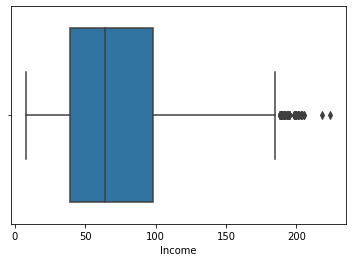

In [83]:
sns.boxplot(x=dataf['Income'])
#sns.boxplot(x=dataf['Mortgage'])

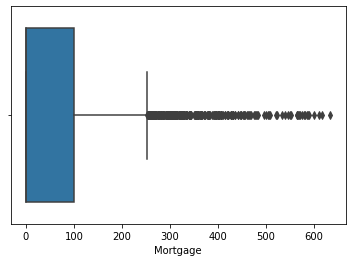

In [84]:
sns.boxplot(x=dataf['Mortgage'])

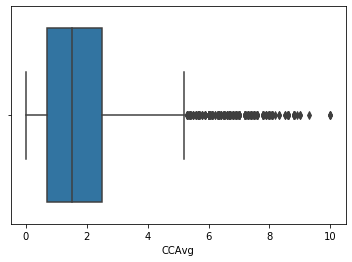

In [85]:
sns.boxplot(x=dataf['CCAvg'])

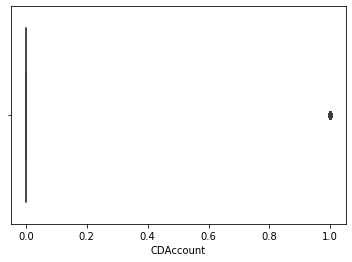

In [86]:
sns.boxplot(x=dataf['CDAccount'])



Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering

From the pair plot we can see that-

1.Age and Experience both have high correlation which each other.

2.Income,CCAvg,Mortage show positive skewness.

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering.


# Step3:EDA(exploratory data analysis)
Studying the data distribution in each attribute and target variable, shareing our
findings.


Information on the features or attributes

The attributes can be divided accordingly :

    The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

    Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
    Securities Account - Does the customer have a securities account with the bank?
    CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
    Online - Does the customer use internet banking facilities?
    Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

    Age - Age of the customer
    Experience - Years of experience
    Income - Annual income in dollars
    CCAvg - Average credit card spending
    Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

    Family - Family size of the customer
    Education - education level of the customer

The nominal variable is :

    ID
    Zip Code



In [87]:
dataf1=dataf.drop(["Experience","ID"],axis=1)
dataf1

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [88]:
dataf.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.048730,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


#### step 3:a) checking unique columns

In [89]:
dataf.apply(lambda x: len(x.unique()))   

ID                   5000
Age                    45
Experience             44
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [90]:
dataf1=dataf1.drop('ZIPCode',axis=1)
dataf1

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


#### step3.b) Number of people with zero mortgage

In [91]:
dataf[dataf['Mortgage'] == 0]['Mortgage'].count()


3462

#### step3 c) Number of people with zero credit card spendinng per month

In [92]:
dataf[dataf['CCAvg'] == 0]['CCAvg'].count()


106

In [93]:
#numerical data
numeric_data = dataf.select_dtypes(include=[np.number])
numeric_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

#### step3 d)value counts of all categorical columns


In [94]:
dataf['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [95]:
dataf['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [96]:
dataf['SecuritiesAccount'].value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

In [97]:
dataf['CDAccount'].value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

In [98]:
dataf['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [99]:
dataf['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [100]:
"""
dataf.drop(columns ='Experience',inplace= True)
dataf.drop(columns ='ID',inplace=True)
dataf.head(2)
"""

"\ndataf.drop(columns ='Experience',inplace= True)\ndataf.drop(columns ='ID',inplace=True)\ndataf.head(2)\n"

# step3 e)Univariate and Bivariate


#### univariate variables

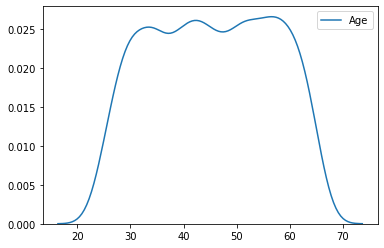

In [101]:
sns.kdeplot(dataf["Age"] )

age-symmetric distribution

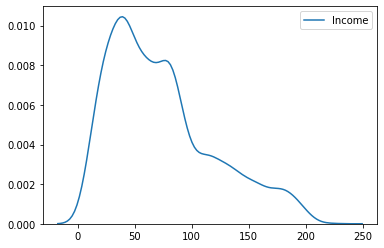

In [102]:
sns.kdeplot(dataf["Income"])

income-right skewed

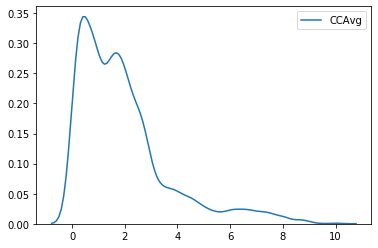

In [103]:
sns.kdeplot(dataf["CCAvg"])

CCAvg-right skewed

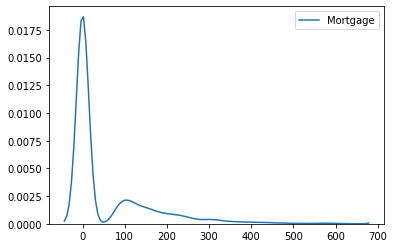

In [104]:
sns.kdeplot(dataf["Mortgage"])

Mortgage-Highly skewed

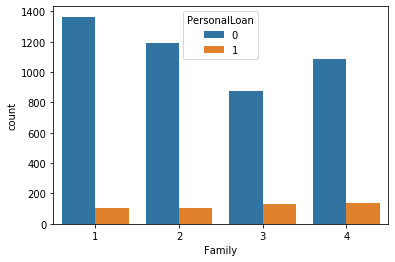

In [105]:
sns.countplot(x="Family",data=dataf,hue="PersonalLoan")

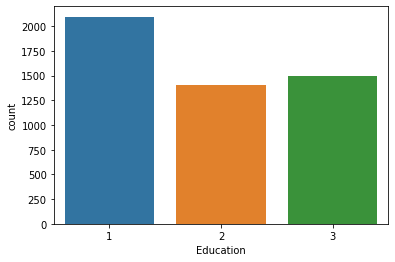

In [106]:
sns.countplot(dataf["Education"])

##### Bivariate variables(this graphs got repeated here. they are same as ploted above commented)

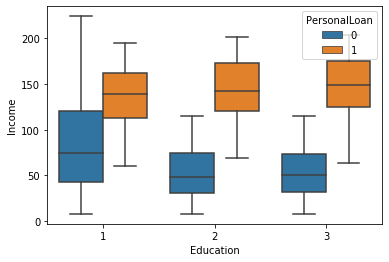

In [107]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=dataf)

If customers whose education level is 1,they have more income. if customers have personal loan they also have the same income levels

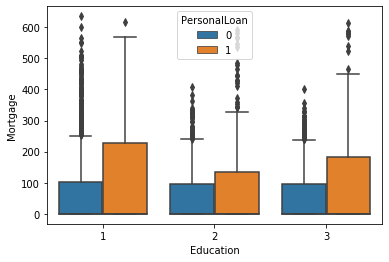

In [108]:
sns.boxplot(x="Education",y='Mortgage',hue="PersonalLoan",data=dataf)

customer with personal loan have high mortgage


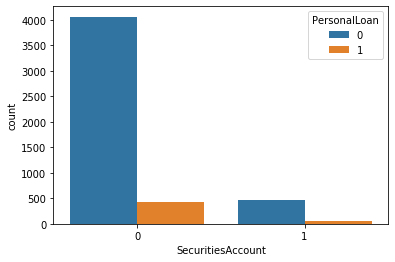

In [110]:
sns.countplot( x=dataf["SecuritiesAccount"],hue=dataf["PersonalLoan"]);
plot.show()

customers who does not have loan have securities account

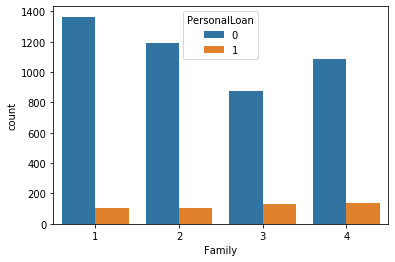

In [114]:
sns.countplot( x=dataf["Family"],hue=dataf["PersonalLoan"]);
plot.show()

Family size does not have any impact in personal loan. But families with size of 3 are more likely to take loan.

##### multivariate variables


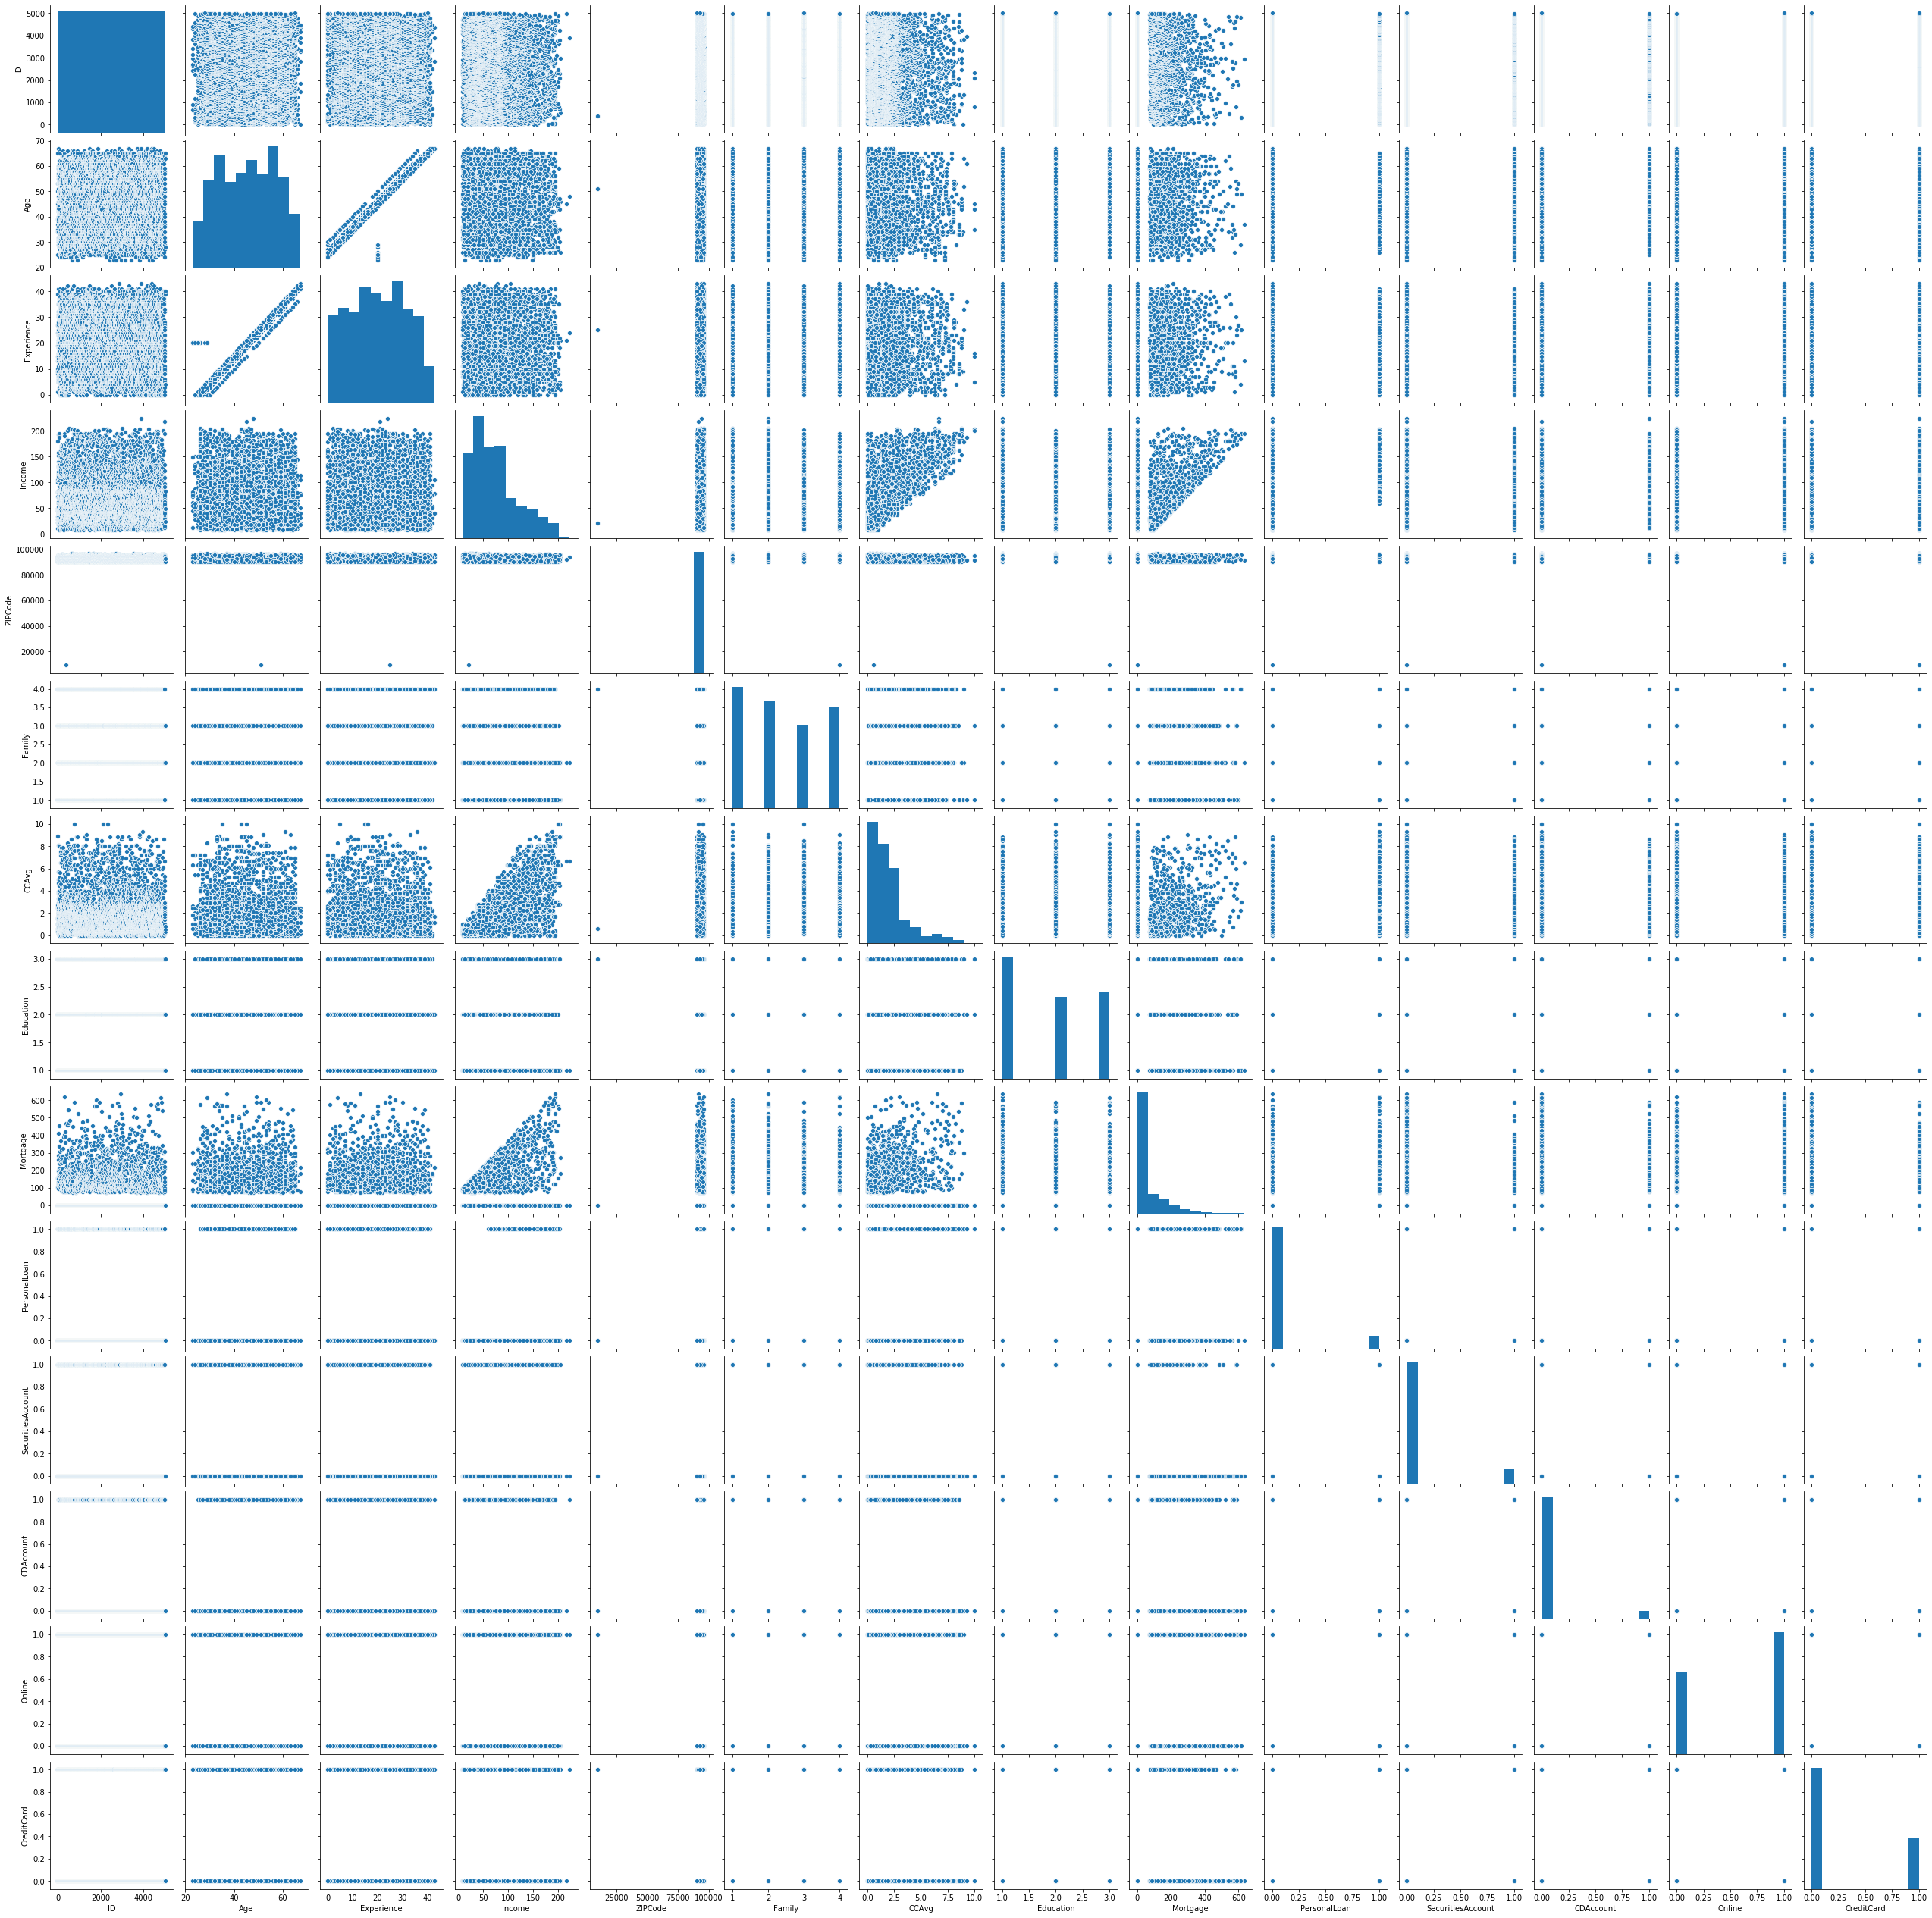

In [115]:
sns.pairplot(dataf)

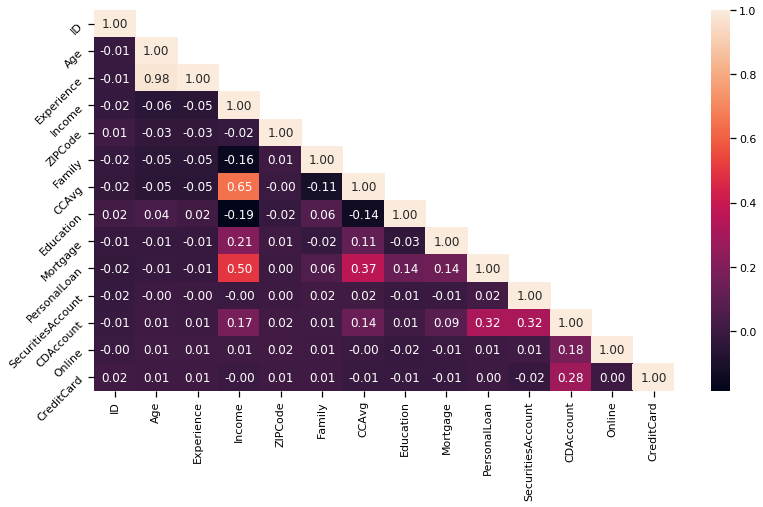

In [116]:
import matplotlib.pyplot as plt
corr= dataf.corr()
sns.set_context("notebook", font_scale=1.0,rc={"lines.linewidth" : 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
a=sns.heatmap(corr,mask=mask, annot=True, fmt=".2f")
rotx=a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty=a.set_yticklabels(a.get_yticklabels(), rotation=45)

Income and CCAvg is moderately correlated. Age and Experience is highly correlated

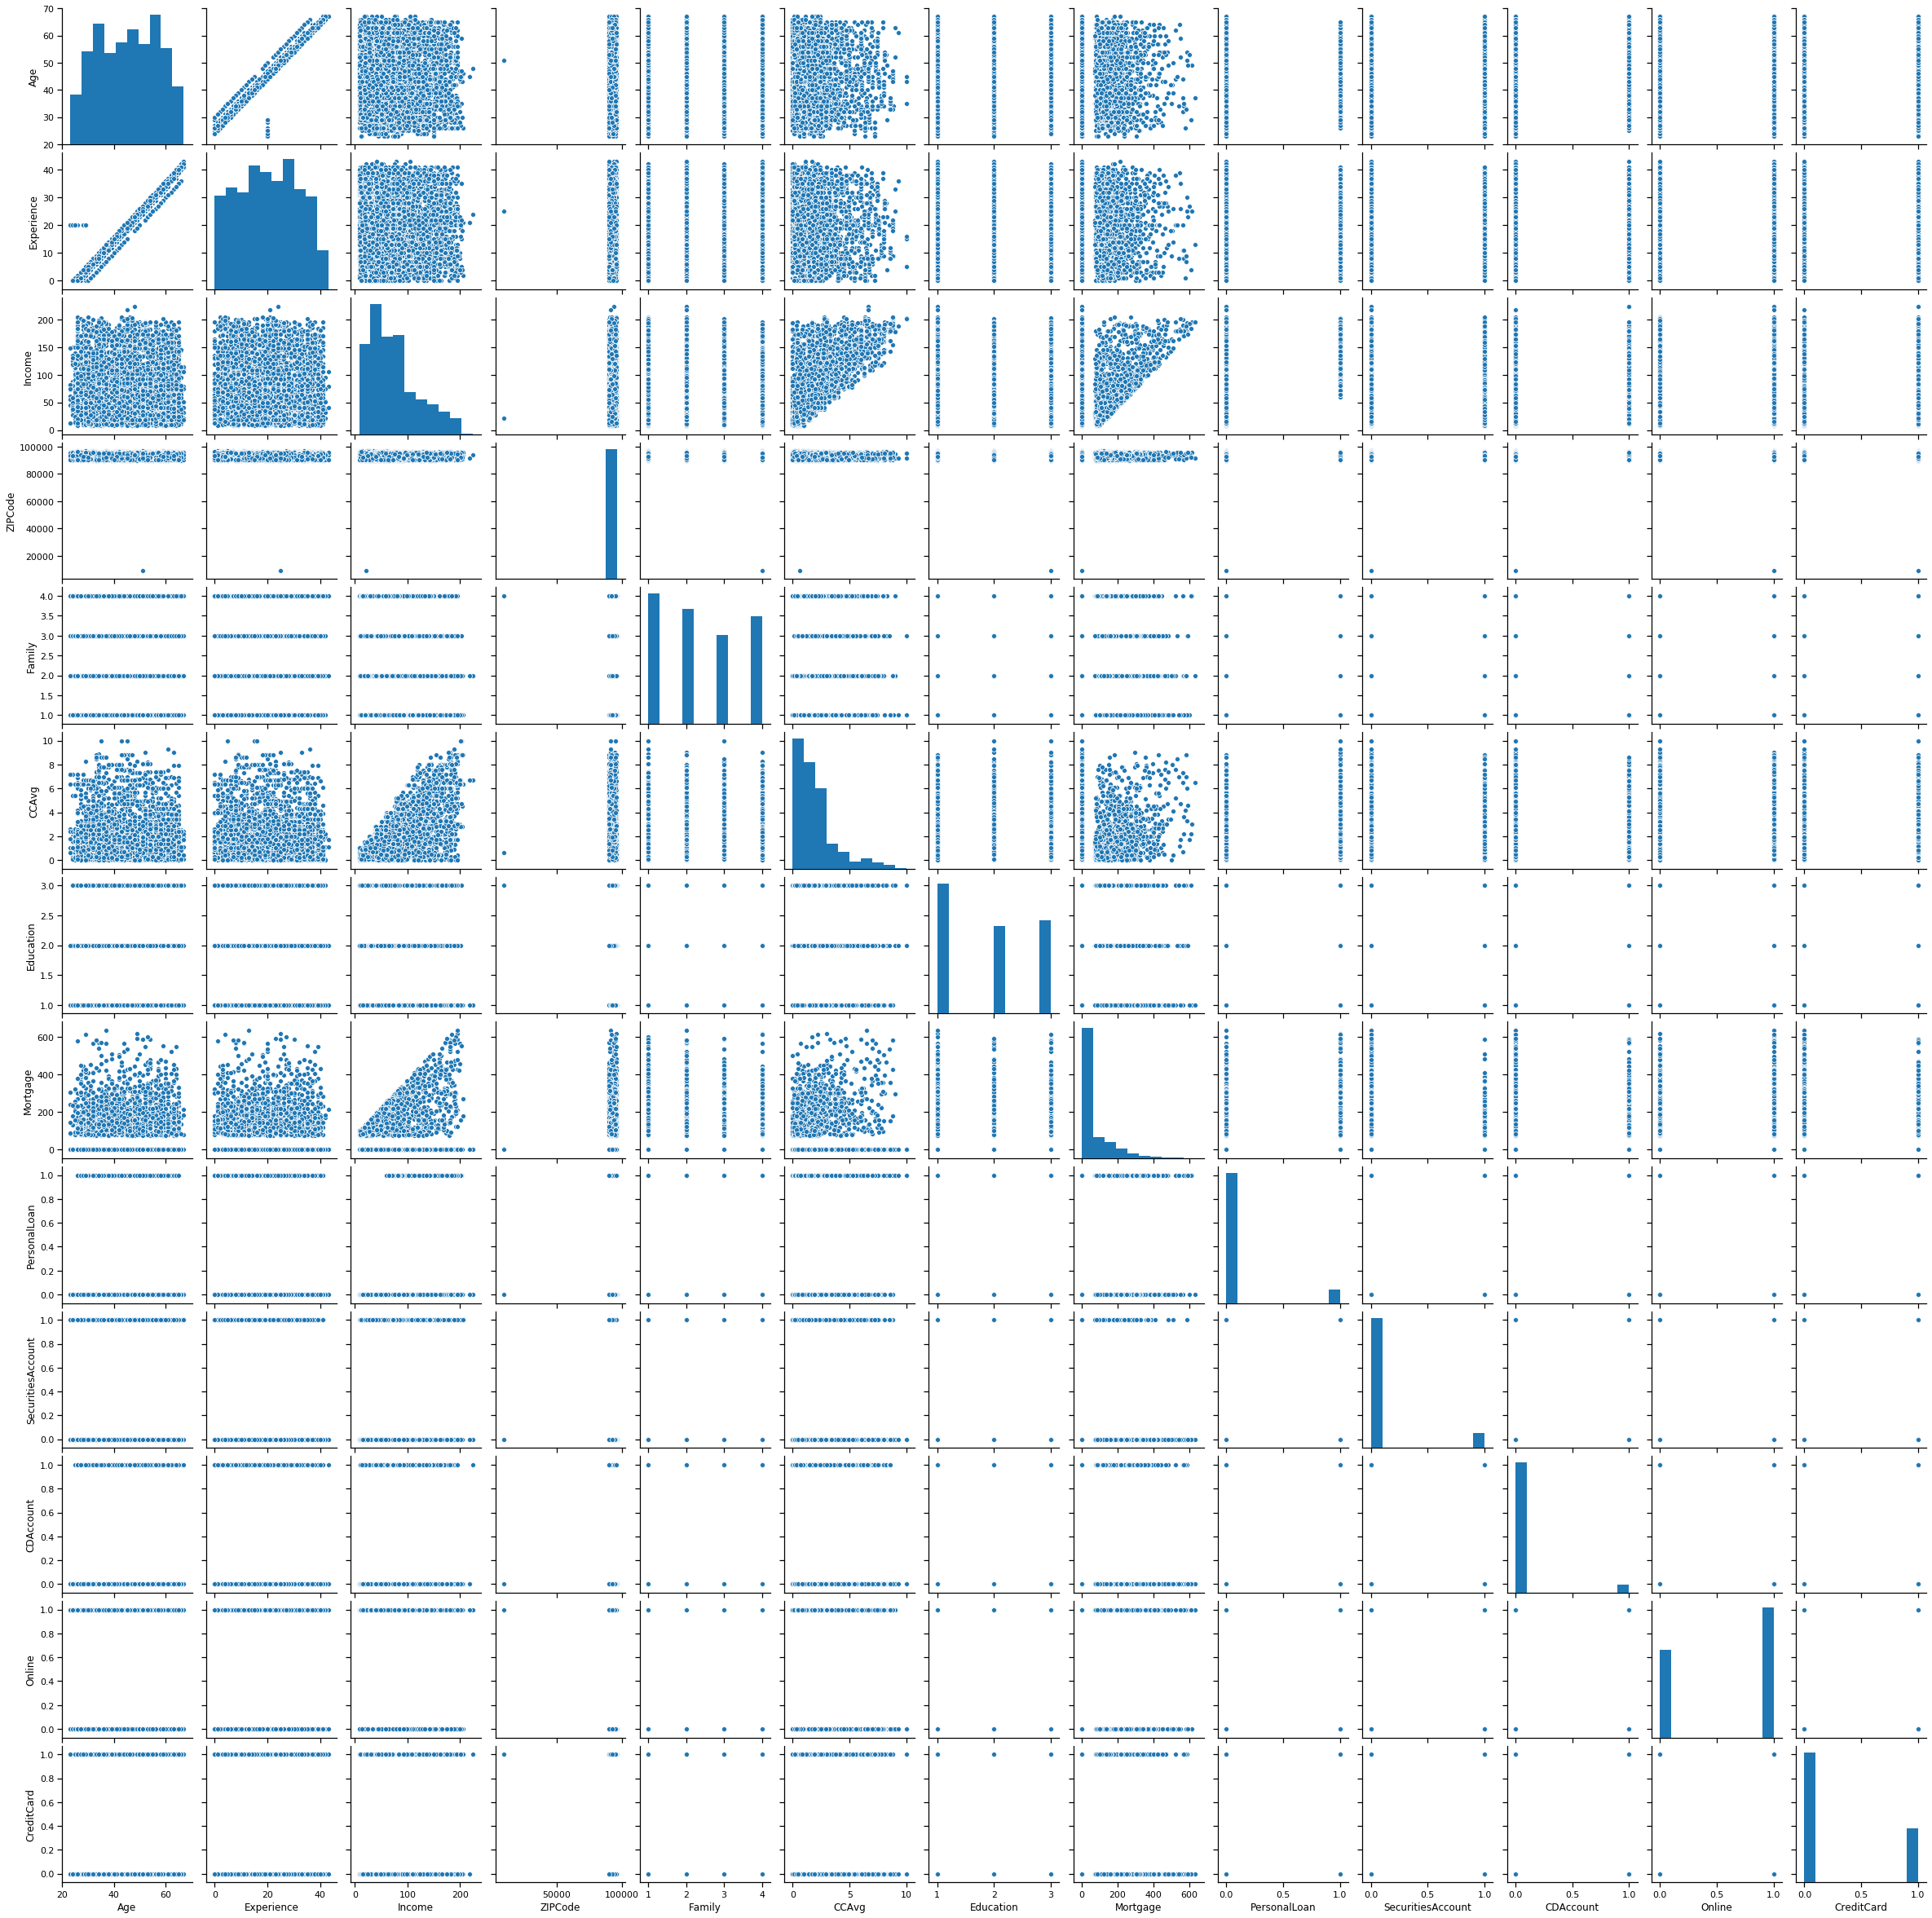

In [117]:
sns.pairplot(dataf.iloc[:,1:])



From the pair plot we can see that-

1.Age and Experience both have high correlation which each other.

2.Income,CCAvg,Mortage show positive skewness.

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering.


#### STEP 4 - transformation of feature variables

In [119]:
categorical_val=[]
continuous_val=[]
for column in dataf.columns:
    print('-'*20)
    print(f"{column} : {dataf[column].unique()}")
    if len(dataf[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

--------------------
ID : [   1    2    3 ... 4998 4999 5000]
--------------------
Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
--------------------
Experience : [ 1. 19. 15.  9.  8. 13. 27. 24. 10. 39.  5. 23. 32. 41. 30. 14. 18. 21.
 28. 31. 11. 16. 20. 35.  6. 25.  7. 12. 26. 37. 17.  2. 36. 29.  3. 22.
 34.  0. 38. 40. 33.  4. 42. 43.]
--------------------
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 1

ID               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Income           AxesSubplot(0.125,0.391471;0.227941x0.222059)
ZIPCode       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CCAvg         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Mortgage            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

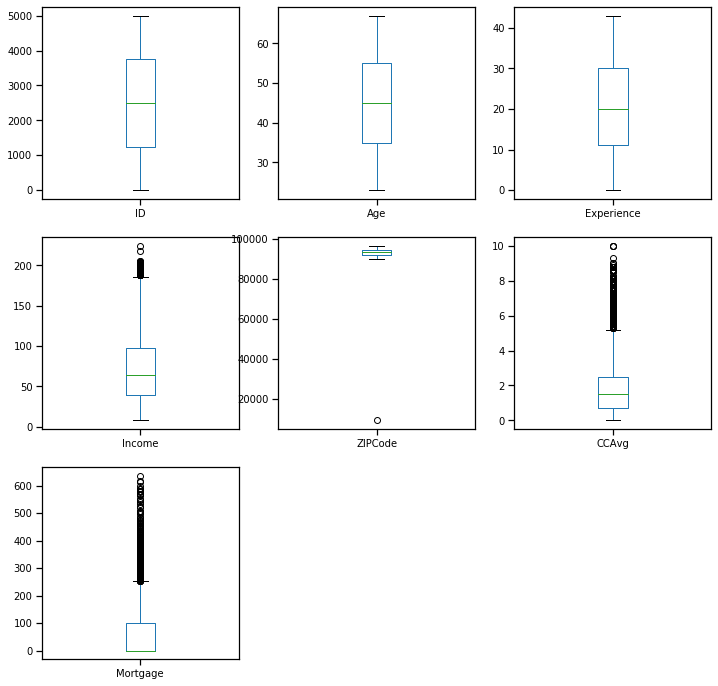

In [122]:
dataf[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(12,12))



Income, CCAvg , Mortgage have Outlier

to treat outlier we will be replacing all those data points whole value less than equal to LL=(Q1-1.5IQR) and greater than equal to UL=(Q3+1.5IQR) by LL and UL.this is known as Capping Method


In [124]:
Outlier = ['Income', 'CCAvg', 'Mortgage']
Q1=dataf[Outlier].quantile(0.25)
Q3=dataf[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    dataf[i][dataf[i]>UL[i]]=UL[i]
    dataf[i][dataf[i]<LL[i]]=LL[i] 

C:\Users\kritika\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kritika\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


ID               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Income           AxesSubplot(0.125,0.391471;0.227941x0.222059)
ZIPCode       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CCAvg         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Mortgage            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

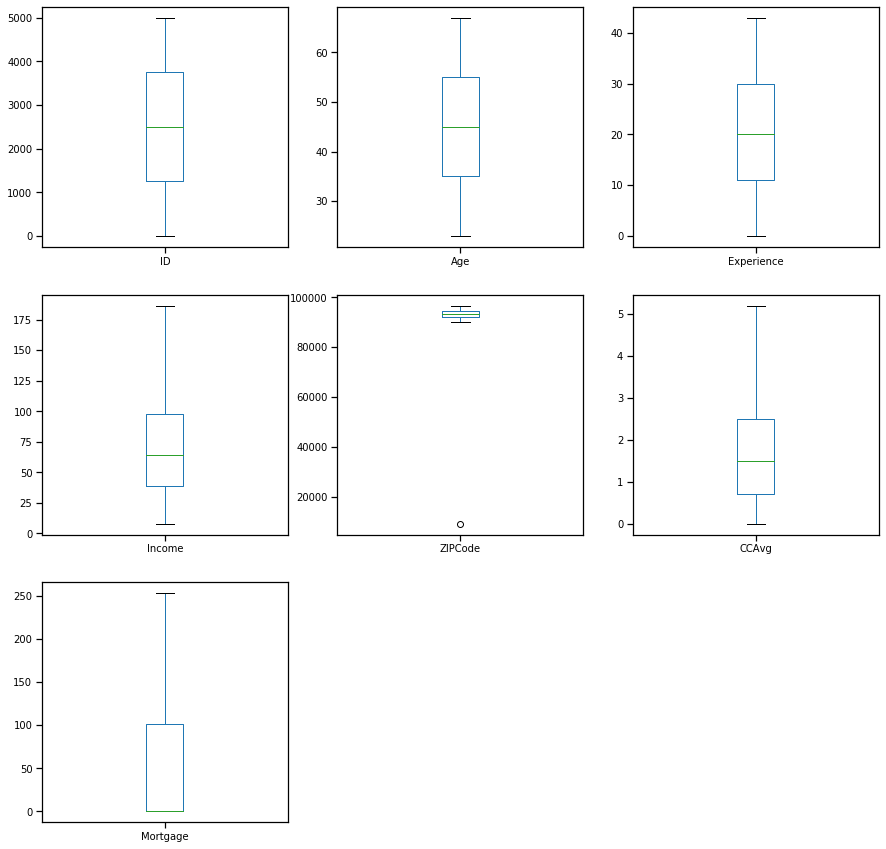

In [126]:
dataf[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(15,15))

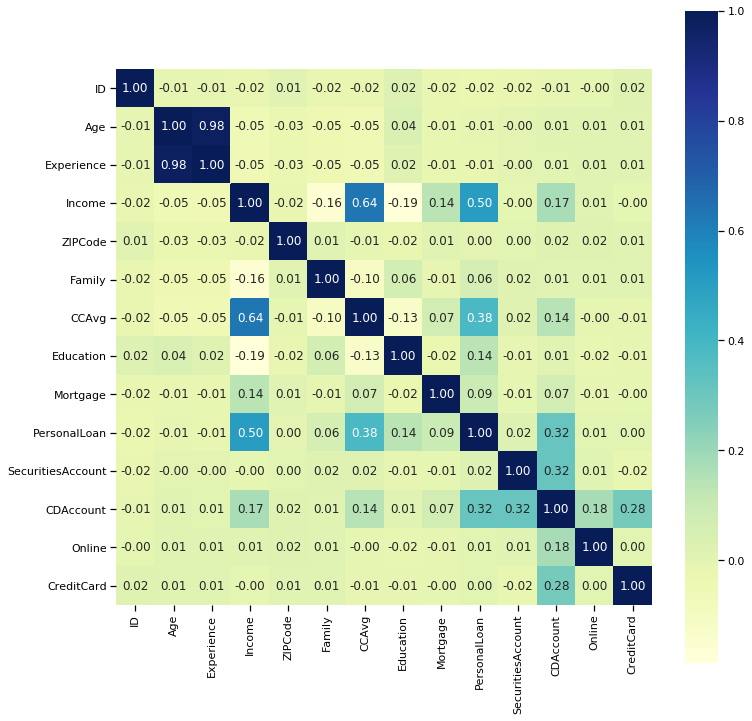

In [127]:
corr=dataf.corr()
fig,ax=plot.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")

#### Step-4: normaalising and splitting the data in the ratio of 70(training): 30(testing)

In [128]:
testing=dataf.drop(['ID','Experience','PersonalLoan'],axis=1)
testing

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49.0,91107,4,1.6,1,0.0,1,0,0,0
1,45,34.0,90089,3,1.5,1,0.0,1,0,0,0
2,39,11.0,94720,1,1.0,1,0.0,0,0,0,0
3,35,100.0,94112,1,2.7,2,0.0,0,0,0,0
4,35,45.0,91330,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40.0,92697,1,1.9,3,0.0,0,0,1,0
4996,30,15.0,92037,4,0.4,1,85.0,0,0,1,0
4997,63,24.0,93023,2,0.3,3,0.0,0,0,0,0
4998,65,49.0,90034,3,0.5,2,0.0,0,0,1,0


In [129]:
x=testing
y=dataf['PersonalLoan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

##### step-6: using logestic regression model to predict the likelyhood of the customer buying the loan

[content from pdf]

Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.


In [132]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x,y)
print(model1.score(x_test,y_test))
y_predict=model1.predict(x_test)
y_predict

0.942


C:\Users\kritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

##### step-7: printing the metrix to evaluate logistic regression model performance

In [133]:
#input metrics
print(x.columns)

Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')


In [134]:
output=y
output=output.to_frame()
output.columns

Index(['PersonalLoan'], dtype='object')

In [135]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.058
Root Mean Squared Error 0.24083189157584592
R2 Score 0.384538474598653


##### step 8: building other classification algorithms and comparing the performances

##### 8.1. Decision tree classifier

[content from pdf]


Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.


In [137]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x,y)
print(model2.score(x_test,y_test))

0.9813333333333333


In [138]:

y_predict=model2.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [139]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.018666666666666668
Root Mean Squared Error 0.13662601021279466
R2 Score 0.8019204286064631


##### 8.2 : naive bayes



Definition: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

Disadvantages: Naive Bayes is is known to be a bad estimator.


In [140]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x, y)
print(model3.score(x_test,y_test))

0.8973333333333333


In [141]:
y_predict=model3.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [142]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10266666666666667
Root Mean Squared Error 0.3204163957519444
R2 Score -0.08943764266445342


##### 8.5: Random forest classifier

[content from pdf]


Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.


In [143]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=2, random_state=10)
model4.fit(x,y)
print(model4.score(x_test,y_test))

0.9066666666666666


In [144]:
y_predict=model4.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.09333333333333334
Root Mean Squared Error 0.30550504633038933
R2 Score 0.009602143032315102


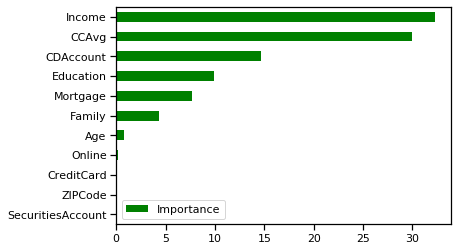

In [147]:
Importance = pd.DataFrame({'Importance':model4.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )

##### 8.4: KNN

[content copied from pdf]


Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.


In [149]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
model5.fit(x,y)
print(model5.score(x_test,y_test))

0.8946666666666667


In [150]:
y_predict=model5.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.10533333333333333
Root Mean Squared Error 0.3245509718570156
R2 Score -0.11773472429210141


##### step-9: bussiness understanding of model



The goal bank is to convert there liability customers into loan customers. they want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. LR: 0.912200 DT: 0.982000 NB: 0.885600 RF: 0.906200 KNN:0.898600

From the above result,it is clear that Decision Tree Algorithm is the best algorithm for predicting whether the customer will opt for personal loans or not.
